# Portfolio Prüfung Wiederholung I WWI2022B
Bitte bearbeiten Sie alle Aufgaben direkt  hier im Notebook und geben Sie die .ipynb-Datei am Ende der Portfolio-Prüfung [hier](https://privacy.dhbw-stuttgart.de/wwi2022b.html) ab.
Für Aufgaben die ohne Code erstellt werden, steht nach der Aufgabenstellung ein Markdown Antwortfeld zur Verfügung. 
Für Aufgaben bei denen ein Code verlangt wird, befindet sich nach der Aufgabenstellung ein interaktives Code-Feld (ggf. mit schon vorab ausgefüllten Code-Fragementen).

Viel Erfolg 

## Aufgabe 1 Python Basics
Ersetzen Sie unten in der Definition der Variable `myName` den String "PeterMueller" durch Ihren Namen. Geben Sie anschließend:

- Ihren Namen ganz normal, 
- Ihren Namen rückwärts und 
- einmal nur die Vokale (a,e,i,o,u) ihres Namens

aus. Verwenden Sie hierfür die Variable `myName`. 

Beispielausgabe:
```
myName = "PeterMueller"
PeterMueller
relleuMreteP
['e', 'e', 'u', 'e', 'e']
```
Hinweis: Der Befehl `print("eeuee")` gibt zwar, wenn der Name "PeterMueller" lautet, auch die korrekte Lösung zum letzten Aufgabenteil aus, wird aber, da er nicht die Variable `myName` verwendet, nicht als korrekt gewertet.

In [42]:
myName = "PeterMueller"
print(myName)
print(myName[::-1])
print([x for x in myName if x in ["a","e","i","o","u"]])

PeterMueller
relleuMreteP
['e', 'e', 'u', 'e', 'e']


<div style="text-align: right"> (___ / 3 Punkte) </div>


## Aufgabe 2 Komplexität von Algorithmen
### a) Geben Sie jeweils für angegebenen Funktionen den Aufwand in der Landau-Notation (Big-Oh) an.

In [43]:
def funktion1(n):
    retValue = 0
    for i in range(n*n,0,-1):
        retValue += i
    return retValue

Der Aufwand für `funktion1` beträgt $O(n^2)$.

In [44]:
def funktion2(n):
    lst = []
    m = n//2 # // is integer division
    for i in range(m):  
        lst.append(i)
        lst[i%n] += i
    return lst 

Der Aufwand für `funktion2` beträgt $O(n)$.

In [45]:
def funktion3(n):
    lst = []
    for i in range(1,n):
       lst.append(i)
       for j in range(1,n,10):
          lst[-1] = lst[-1]*j
    return lst

Der Aufwand für `funktion3` beträgt $O(n^2)$.

<div style="text-align: right"> (___ / 6 Punkte) </div>


### b) Ergänzen Sie den Code in der folgenden Codezelle geeignet, so dass dieser ein Schaubild der Laufzeiten für die Funktion 1 - 3 erzeugt.

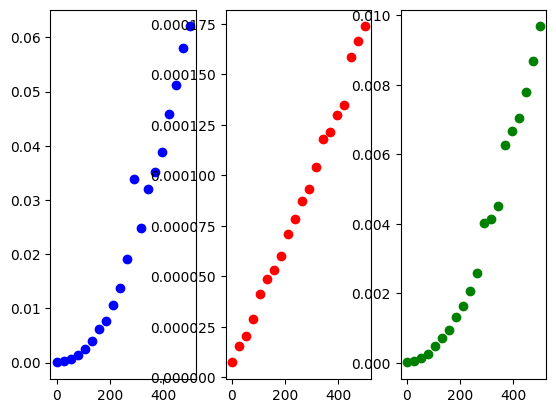

In [46]:
import matplotlib.pyplot as plt
import numpy as np
import timeit

ns = np.linspace(1, 500, 20, dtype=int)

ts1 = [timeit.timeit(stmt=f'funktion1({n})', 
                     #setup= f'',
                     globals=globals(), 
                     number=3)
       for n in ns]

ts2 = [timeit.timeit(stmt=f'funktion2({n})', 
                     #setup= f'',
                     globals=globals(), 
                     number=3)
       for n in ns]

ts3 = [timeit.timeit(stmt=f'funktion3({n})', 
                     #setup= f'',
                     globals=globals(), 
                     number=3)
       for n in ns]

fig, (ax1, ax2, ax3) = plt.subplots(1,3)
ax1.plot(ns, ts1, 'ob')
ax2.plot(ns,ts2,'or')
ax3.plot(ns,ts3,'og')

<div style="text-align: right"> (___ / 4 Punkte) </div>


## Aufgabe 3 Implementieren einer Array-List

In der Vorlesung wurde eine Array-Backed-List vorgestellt. Unten steht der beinahe vollständige Code für diesen Datentyp. Führen Sie diesen einmal aus, bevor Sie sich an die Teilaufgaben machen.


In [47]:
# run one time

# Array Backed List
import numpy as np

class ArrayList:
    def __init__(self):
        self.data = np.empty(1, dtype=object)
        self.size = 0
 
    def __getitem__(self, idx):
        """Implements `x = self[idx]`"""
        assert isinstance(idx, int), 'Index must be an integer'
        if idx < 0:
            idx += self.size
        if idx < 0 or idx >= self.size:
            raise IndexError('list index out of range')
        return self.data[idx]        

    def __setitem__(self, idx, value):
        """Implements `self[idx] = x`"""
        assert isinstance(idx, int), 'Index must be an integer'
        if idx < 0:
            idx += self.size
        if idx < 0 or idx >= self.size:
            raise IndexError('list index out of range')
        self.data[idx] = value

    def __delitem__(self, idx):
        """Implements `del self[idx]`"""
        assert isinstance(idx, int), 'Index must be an integer'
        if idx < 0:
            idx += self.size
        if idx < 0 or idx >= self.size:
            raise IndexError('list index out of range')
        for i in range(idx, self.size-1):
            self.data[i] = self.data[i+1]
        self.size -= 1
           
    def __repr__(self):
        """Supports inspection"""
        return '[' + ','.join(repr(self.data[i]) for i in range(self.size)) + ']'

### a) Definition vervollständigen
Ergänzen Sie in der Implementierung die Methoden `append()` (welche ein Element an das Ende der Liste anfügt) und `__len__()` (welche die aktuelle Länge der Liste zurückliefert). Achten Sie darauf, dass in der Methode `append()` das interne `numpy`-Array vergrößert werden muss. Verfolgen Sie wie in der Vorlesung den Ansatz, das Array zu verdoppeln, sobald der letzte freie Platz im Array gefüllt wird.

In [48]:
class ArrayList(ArrayList):
    def append(self, val):
        if self.size == len(self.data): # if the backing array is full
            # double the backing array 
            newData = np.empty(2*len(self.data),dtype=object)
            for i in range(self.size):
                newData[i] = self.data[i]
            self.data = newData
        
        self.data[self.size] = val
        self.size += 1
        
        # put the given value "val" at the end of the list
        

    def __len__(self):
        """Implements `len(self)`"""
        # returns the length of the list
        return self.size
        

In [49]:
myList = ArrayList();
for i in range(10):
    myList.append(i)

print(myList)
print(len(myList))

[0,1,2,3,4,5,6,7,8,9]
10


<div style="text-align: right"> (___ / 8 Punkte) </div>


### b) Maximum ermitteln
Implementieren Sie die Methode `max()`, welche das Maximum aller Werte aus der Liste zurückgibt.

In [50]:
class ArrayList(ArrayList):
    def max(self):
        # returns the maximum value of the list
        assert self.size > 0
        max = self.data[0]
        for i in range(self.size):
            if self.data[i] > max:
                max = self.data[i]
        
        return max
    

In [51]:
myList = ArrayList()
myList.data = np.array([1,2,4,3,None,None,None,None])
myList.size = 4

print(myList.max()) # should return 4

4


<div style="text-align: right"> (___ / 4 Punkte) </div>


### c) Methode pop()
Implementieren Sie die Methode `pop()`, welche das letze Element der Liste zurückliefert und dieses anschließend löscht.

In [52]:
class ArrayList(ArrayList):
    def pop(self):
        # returns the last element of the list and deletes it
        retValue = self.data[self.size -1]
        self.data[self.size -1] = None
        self.size -= 1
        return retValue    

<div style="text-align: right"> (___ / 5 Punkte) </div>


In [53]:
myList = ArrayList()
myList.data = np.array([1,2,4,3,None,None,None,None])
myList.size = 4

print(myList) # should return [1,2,4,3e]
print(myList.pop()) # should return 3
print(myList) # should return [1,2,4]

[1,2,4,3]
3
[1,2,4]


## Abgabe
Bitte denken Sie daran, ihre Notebook-Datei auf den Abgabe-Server hochzuladen.

https://privacy.dhbw-stuttgart.de/wwi2022b.html